<a href="https://colab.research.google.com/github/kianahs/AI_coursework_2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Lost in the closet (Classification)

You are an artist who secluded yourself for years to come up with the perfect design for a new brand
of clothes. However, your time off from civilisation was not so beneficial since you cannot distinguish
a T-shirt from a dress or a sneaker from a sandal any more. In order to address that issue, you choose
to train a Convolutional Neural Network (using PyTorch) that will help you identify each cloth to
match the perfect design you created. In order to train it, you decide to rely on the dataset fashion
MNIST (https://github.com/zalandoresearch/fashion-mnist).
You can access the data using the following lines (we strongly advise you to copy this code from the
fashion mnist.py file attached to this coursework):


In [5]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs
# and hence reproducible outcomes
torch.manual_seed(0)


# If you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

Label is: 3
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


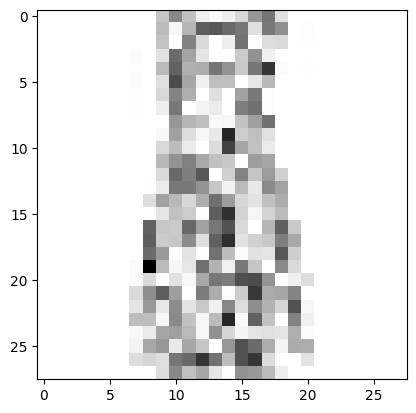

In [6]:
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

1. Given the problem, what is the most appropriate loss function to use? Provide the name of the
loss, its formula and the formula interpretation in your report.
This question carries 10% of the mark for this coursework.

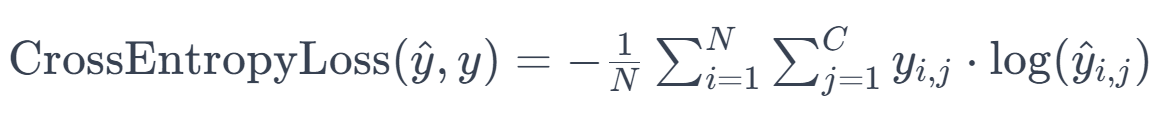

2. Create and train a Convolutional Neural Network corresponding to the following architecture
(also see the diagram below):
1. Input image size: 28 × 28 × 1 (height × width × number of channels).
2. First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels.
Activation function.
3. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
4. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels.
Activation function.
5. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
6. First fully-connected layer with input size being the output size of max pooling layer in 5.
(flattened, i.e. 1024) and output size 1024. Activation function.
7. Second fully-connected layer with input size being the output size of fully connected layer in
6. (i.e. 1024) and output size 256. Activation function.
8. Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256)
and output size 10.


For training, initialise your weights using the Xavier Uniform initialisation, use ReLU as the
activation function, a learning rate of 0.1 with the SGD optimiser. You will train your neural
network for 30 epochs. In your report, provide the following: (a) final (train and test) accuracy
obtained; (b) plot of the accuracy on the training and test sets per each epoch, comment on the
speed of performance changes across epochs; (c) plot of the train loss per epoch (total sum of
per batch losses for each epoch) and comment on the speed of decrease.
This question carries 15% of the mark for this coursework.


In [7]:
# CNN implementation

class MyCNN(nn.Module):
  def __init__(self, activation_function):
    super(MyCNN, self).__init__()
    # TO DO

    # Alternatively use the Sequential container to run layers sequentially

    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride=2),
                                   nn.Conv2d(32, 64, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride = 2))

    # Alternatively use the Sequential container to run layers sequentially

    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), activation_function, nn.Linear(1024,256), activation_function, nn.Linear(256, 10))

  def forward(self, x):
    # TO DO
    # Alternatively use the Sequential container to run layers sequentially

    x = self.cnn_model(x)
    # x = x.view(x.size(0), -1)
    x = x.view(-1, 1024)
    x = self.fc_model(x)

    return x



In [20]:


def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    # TO DO
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total


def test_evaluation(dataloader):
    total, correct = 0,0
    net.eval()
    with torch.no_grad():
      for data in dataloader:
        # TO DO
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
      return 100 * correct / total

def weights_init(layer):
    if isinstance(layer, nn.Linear):
      # TO DO
      nn.init.xavier_uniform_(layer.weight)
      # This would be an uniform initialization between -1 and 1
      # nn.init.uniform_(layer.weight, -1, 1)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)


def train(net, loss_fn, opt, device, train_loader):

    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    test_accuracy = []

    for epoch in range(max_epochs):
      loss_epoch = 0
      for i, data in enumerate(train_loader, 0):
        # TO DO
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_epoch += loss.item()
        # TO DO
      loss_epoch_array.append(loss_epoch)
      train_accuracy.append(evaluation(train_loader))
      test_accuracy.append(test_evaluation(test_loader))
      print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

    return loss_epoch_array, train_accuracy,test_accuracy

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

cuda:0
Epoch 1: loss: 956.2325278893113, train accuracy: 88.36, test accuracy:87.25
Epoch 2: loss: 588.2964059747756, train accuracy: 90.215, test accuracy:88.96
Epoch 3: loss: 505.41798212379217, train accuracy: 91.06666666666666, test accuracy:89.24
Epoch 4: loss: 449.7502612294629, train accuracy: 92.58166666666666, test accuracy:90.26
Epoch 5: loss: 405.7678696978837, train accuracy: 93.33333333333333, test accuracy:90.62
Epoch 6: loss: 364.24176561273634, train accuracy: 93.94666666666667, test accuracy:90.7
Epoch 7: loss: 328.8119711531326, train accuracy: 94.21166666666667, test accuracy:90.25
Epoch 8: loss: 292.69462854694575, train accuracy: 95.35166666666667, test accuracy:90.79
Epoch 9: loss: 266.4430169099942, train accuracy: 95.755, test accuracy:90.94
Epoch 10: loss: 237.15723888855428, train accuracy: 95.825, test accuracy:90.32
Epoch 11: loss: 212.13429620768875, train accuracy: 96.59833333333333, test accuracy:90.59
Epoch 12: loss: 188.47139495122246, train accuracy: 9

In [21]:
# print(label)

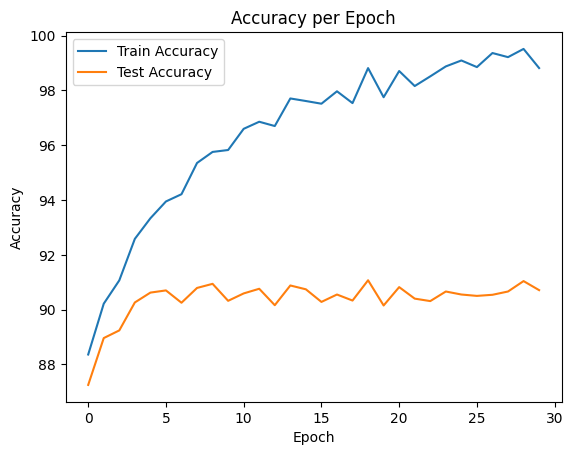

In [22]:
def plot_accuracies(train_accuracy,test_accuracy):
  plt.plot(train_accuracy, label='Train Accuracy')
  plt.plot(test_accuracy, label='Test Accuracy')
  plt.title('Accuracy per Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

plot_accuracies(train_accuracy,test_accuracy)

In [23]:
# input_data[0,:,:,:].numpy().shape

In [24]:
# label

In [25]:
# input_data[0,:,:,:].numpy()

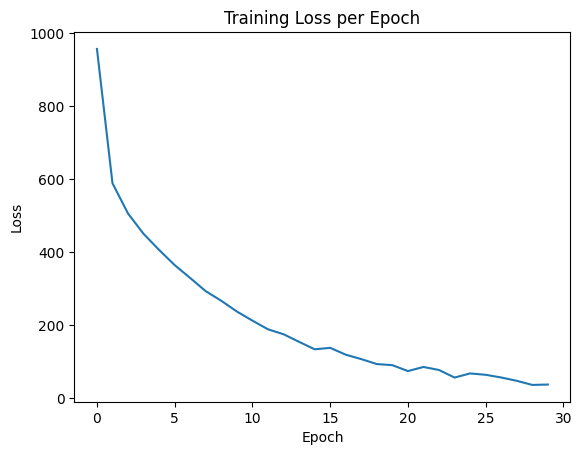

In [26]:
def plot_loss_epoch(loss_epoch_array):
  plt.plot(loss_epoch_array, label='Train Loss')
  plt.title('Training Loss per Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

plot_loss_epoch(loss_epoch_array)

In [27]:
def show_final_accuracies(train_accuracy,test_accuracy):
  final_train_accuracy = train_accuracy[-1]
  final_test_accuracy = test_accuracy[-1]
  print(f'Final Train Accuracy: {final_train_accuracy:.4f}')
  print(f'Final Test Accuracy: {final_test_accuracy:.4f}')

show_final_accuracies(train_accuracy,test_accuracy)

Final Train Accuracy: 98.8167
Final Test Accuracy: 90.7100


3. Run three experiments each time changing all the current activation functions to one of the
following: Tanh, Sigmoid and ELU. In your report, provide only the final classification accuracy
values (train and test) per activation function and comment on the result.
This question carries 6% of the mark for this coursework.


cuda:0
Epoch 1: loss: 829.7872372493148, train accuracy: 87.39833333333333, test accuracy:86.42
Epoch 2: loss: 577.1381077058613, train accuracy: 90.62166666666667, test accuracy:88.35
Epoch 3: loss: 488.11289485916495, train accuracy: 92.195, test accuracy:89.99
Epoch 4: loss: 426.39873411506414, train accuracy: 93.105, test accuracy:89.7
Epoch 5: loss: 371.8147571552545, train accuracy: 94.15, test accuracy:90.2
Epoch 6: loss: 325.70599200669676, train accuracy: 94.45333333333333, test accuracy:89.85
Epoch 7: loss: 283.96427516872063, train accuracy: 95.98666666666666, test accuracy:91.07
Epoch 8: loss: 243.0382859427482, train accuracy: 96.34, test accuracy:90.91
Epoch 9: loss: 210.22937233094126, train accuracy: 97.04833333333333, test accuracy:90.91
Epoch 10: loss: 178.30657934211195, train accuracy: 97.19833333333334, test accuracy:90.57
Epoch 11: loss: 146.81931792129762, train accuracy: 97.55333333333333, test accuracy:90.69
Epoch 12: loss: 123.75523306359537, train accuracy: 9

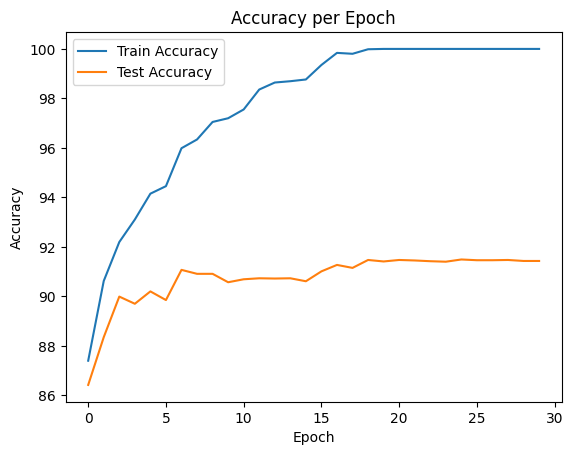

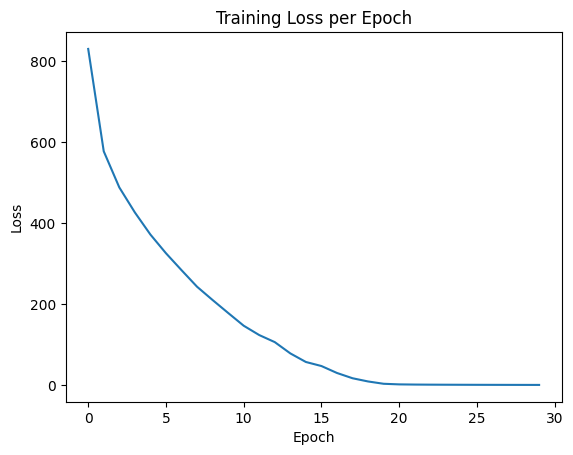

Final Train Accuracy: 100.0000
Final Test Accuracy: 91.4300


In [28]:
#tanh

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.Tanh()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 4339.199498414993, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 2815.3788004517555, train accuracy: 65.27, test accuracy:64.52
Epoch 3: loss: 1442.4780540466309, train accuracy: 73.22333333333333, test accuracy:72.45
Epoch 4: loss: 1240.396277666092, train accuracy: 76.665, test accuracy:76.16
Epoch 5: loss: 1121.3489764779806, train accuracy: 78.12, test accuracy:77.18
Epoch 6: loss: 1019.869856402278, train accuracy: 80.61833333333334, test accuracy:79.68
Epoch 7: loss: 938.5968194156885, train accuracy: 82.145, test accuracy:81.12
Epoch 8: loss: 878.1837296113372, train accuracy: 81.755, test accuracy:80.7
Epoch 9: loss: 825.2634975239635, train accuracy: 84.15333333333334, test accuracy:83.33
Epoch 10: loss: 782.244991607964, train accuracy: 84.055, test accuracy:83.03
Epoch 11: loss: 743.8443978205323, train accuracy: 85.95333333333333, test accuracy:84.82
Epoch 12: loss: 712.9623600840569, train accuracy: 85.85, test accuracy:85.32
Epoch 13: loss:

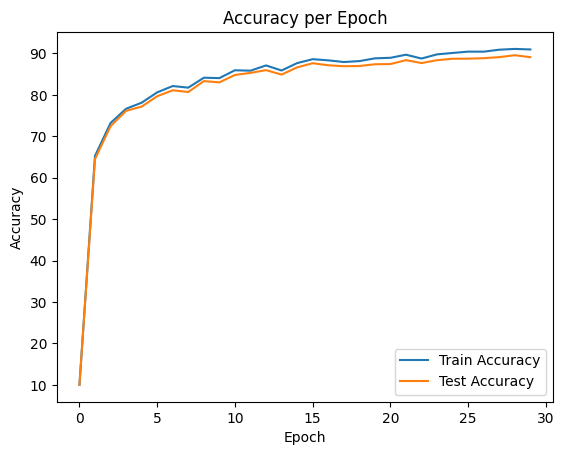

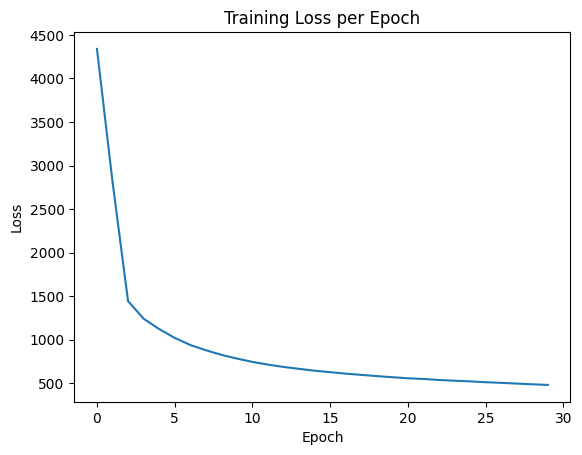

Final Train Accuracy: 90.9750
Final Test Accuracy: 89.1100


In [30]:
#sigmoid

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.Sigmoid()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 824.9285953715444, train accuracy: 88.13166666666666, test accuracy:86.97
Epoch 2: loss: 570.0323896557093, train accuracy: 90.21, test accuracy:88.36
Epoch 3: loss: 487.96569338813424, train accuracy: 91.63666666666667, test accuracy:89.05
Epoch 4: loss: 432.131545400247, train accuracy: 92.69, test accuracy:89.68
Epoch 5: loss: 380.8885939633474, train accuracy: 93.48333333333333, test accuracy:90.26
Epoch 6: loss: 337.72692265873775, train accuracy: 94.47, test accuracy:90.36
Epoch 7: loss: 298.19132828502916, train accuracy: 94.94166666666666, test accuracy:89.96
Epoch 8: loss: 269.6708604784217, train accuracy: 95.9, test accuracy:90.29
Epoch 9: loss: 236.2236539388541, train accuracy: 96.11166666666666, test accuracy:90.72
Epoch 10: loss: 210.32343286741525, train accuracy: 95.875, test accuracy:89.67
Epoch 11: loss: 187.88377663458232, train accuracy: 97.36833333333334, test accuracy:90.58
Epoch 12: loss: 175.26310816744808, train accuracy: 97.3616666666666

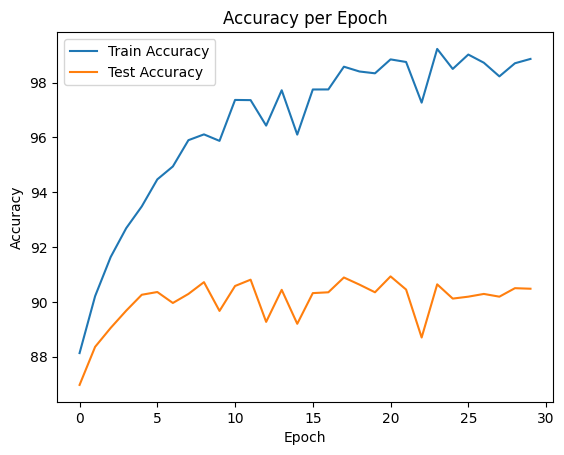

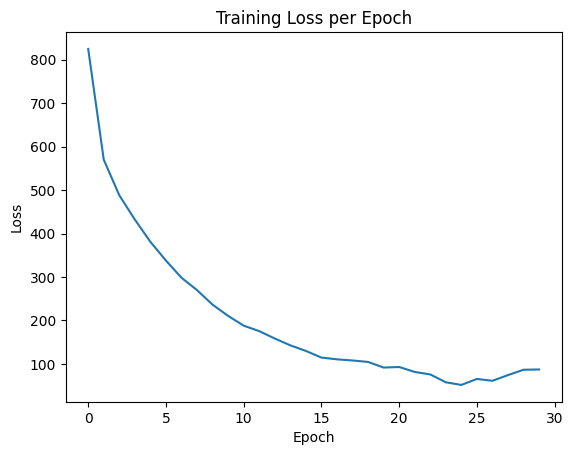

Final Train Accuracy: 98.8650
Final Test Accuracy: 90.4800


In [31]:
#ELU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ELU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

4. Keeping ReLU, use 5 different learning rates: 0.001, 0.1, 0.5, 1, 10. In your report, provide the
final train loss, as well as the final accuracy values for both train and test for each learning rate
and comment on the trade-offs between speed and stability of convergence. Comment on why
you get the Nan loss if any.
This question carries 9% of the mark for this coursework.

cuda:0
Epoch 1: loss: 2798.1289209127426, train accuracy: 69.90833333333333, test accuracy:69.18
Epoch 2: loss: 1450.185263991356, train accuracy: 73.565, test accuracy:72.63
Epoch 3: loss: 1294.1799457520247, train accuracy: 75.27833333333334, test accuracy:73.76
Epoch 4: loss: 1206.0342729836702, train accuracy: 77.46, test accuracy:76.4
Epoch 5: loss: 1139.8101535737514, train accuracy: 78.27833333333334, test accuracy:76.98
Epoch 6: loss: 1085.6443574726582, train accuracy: 78.09, test accuracy:76.8
Epoch 7: loss: 1037.3868021517992, train accuracy: 80.37333333333333, test accuracy:79.45
Epoch 8: loss: 997.4235660433769, train accuracy: 81.76333333333334, test accuracy:80.8
Epoch 9: loss: 960.6439887285233, train accuracy: 81.04333333333334, test accuracy:79.49
Epoch 10: loss: 927.190443880856, train accuracy: 82.245, test accuracy:81.18
Epoch 11: loss: 897.1272812485695, train accuracy: 83.44666666666667, test accuracy:82.12
Epoch 12: loss: 871.9368741214275, train accuracy: 83.30

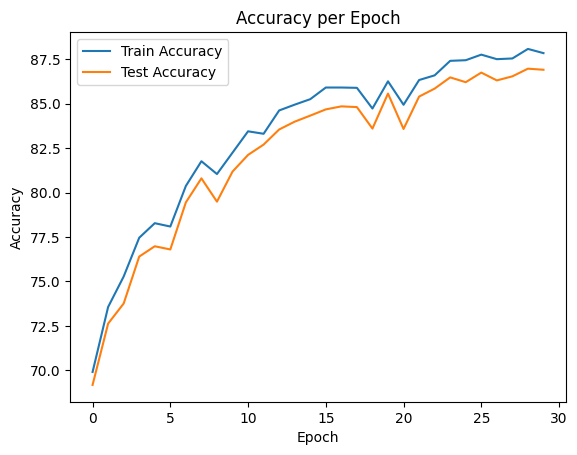

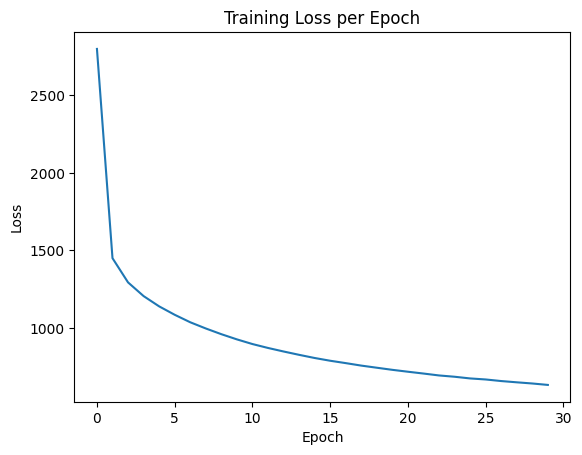

Final Train Accuracy: 87.8450
Final Test Accuracy: 86.9100


In [32]:
#ReLU lr 0.001

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.001)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 990.7334556952119, train accuracy: 87.57666666666667, test accuracy:86.4
Epoch 2: loss: 608.393916875124, train accuracy: 90.15833333333333, test accuracy:88.51
Epoch 3: loss: 518.4979765936732, train accuracy: 88.94333333333333, test accuracy:87.36
Epoch 4: loss: 463.4901605695486, train accuracy: 91.22666666666667, test accuracy:88.87
Epoch 5: loss: 423.2596372012049, train accuracy: 92.98666666666666, test accuracy:90.53
Epoch 6: loss: 383.6056578652933, train accuracy: 92.66, test accuracy:90.01
Epoch 7: loss: 350.5585457533598, train accuracy: 94.42166666666667, test accuracy:90.79
Epoch 8: loss: 317.81513037905097, train accuracy: 94.65333333333334, test accuracy:90.59
Epoch 9: loss: 290.60930794104934, train accuracy: 95.15166666666667, test accuracy:90.73
Epoch 10: loss: 258.57874133996665, train accuracy: 95.41666666666667, test accuracy:90.49
Epoch 11: loss: 236.10182551364414, train accuracy: 95.52833333333334, test accuracy:90.39
Epoch 12: loss: 213.21

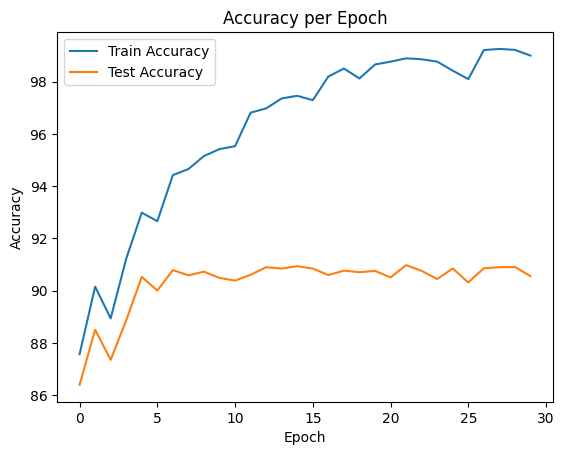

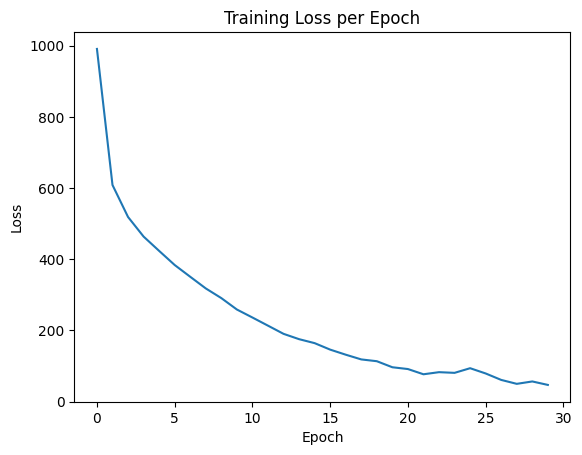

Final Train Accuracy: 98.9917
Final Test Accuracy: 90.5600


In [33]:
#ReLU lr 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 4442.94540771842, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4324.370372533798, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 4324.21927690506, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: 4324.087229013443, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: 4323.995370149612, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: 4324.217707633972, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: 4323.564521789551, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: 4324.338964939117, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: 4324.689711809158, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: 4323.549697399139, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: 4323.760553598404, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: 4324.615392208099, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: 4324.970387935638, train accuracy: 10.0, test accuracy:10.0
Epoch 14: loss: 

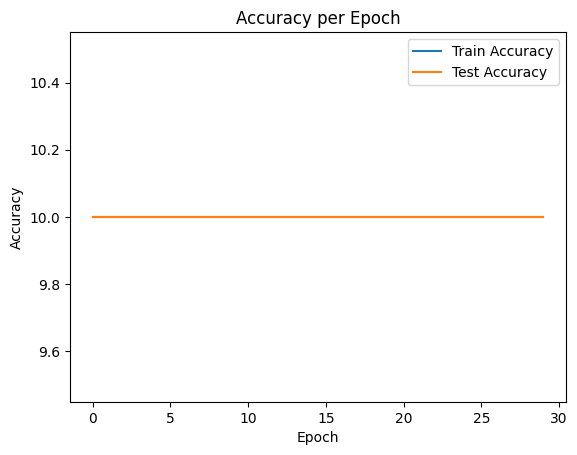

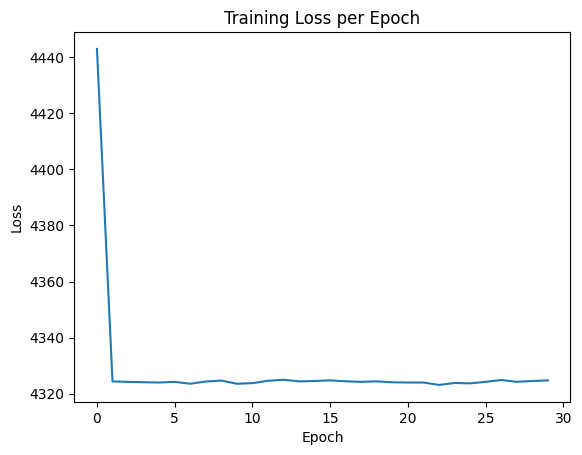

Final Train Accuracy: 10.0000
Final Test Accuracy: 10.0000


In [34]:
#ReLU lr 0.5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.5)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 4339.735475182533, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4331.456413030624, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 4330.548115730286, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: 4331.325505971909, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: 4332.23775601387, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: 4331.259285211563, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: 4331.512355327606, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: 4332.012447357178, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: 4331.945426940918, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: 4331.704536914825, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: 4332.087589025497, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: 4331.525039672852, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: 4331.45264673233, train accuracy: 10.0, test accuracy:10.0
Epoch 14: loss: 

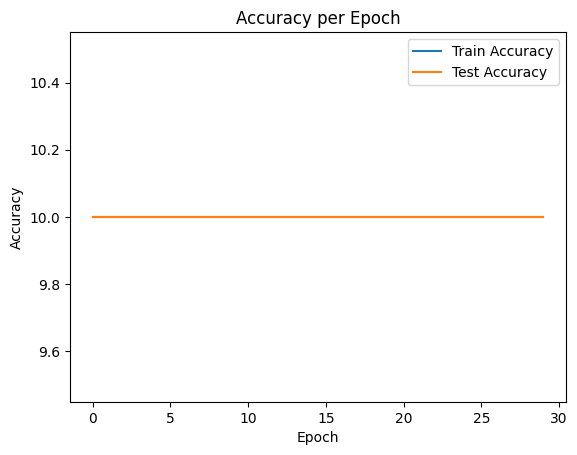

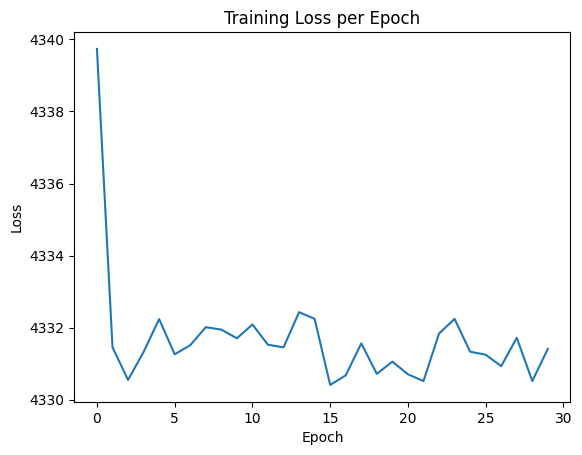

Final Train Accuracy: 10.0000
Final Test Accuracy: 10.0000


In [35]:
#ReLU lr 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 1.0924787185134673e+26, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4643.285359621048, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 4635.891339302063, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: 4631.938836812973, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: 4641.200116157532, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: 4633.300131320953, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: 4624.553462028503, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: 4630.13663816452, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: 4632.892643928528, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: 4638.680844306946, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: 4637.595232963562, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: 4641.555650234222, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: 4629.158261299133, train accuracy: 10.0, test accuracy:10.0
Epoch 14: 

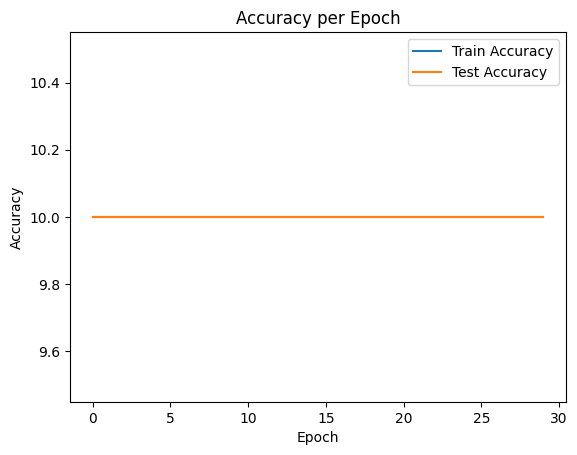

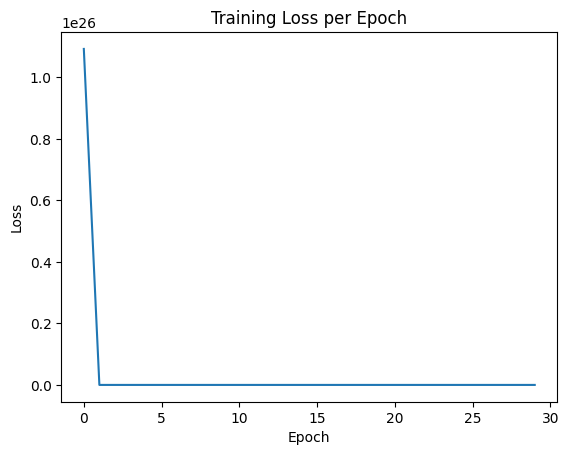

Final Train Accuracy: 10.0000
Final Test Accuracy: 10.0000


In [36]:
#ReLU lr 10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 10)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

5. Add a dropout of 0.3 rate on the second fully connected layer (keeping ReLU and learning rate 0.1)
0.1). In your report, provide the final train and test accuracy values and explain how the dropout
affects the performance.
This question carries 10% of the mark for this coursework.

In [37]:
class MyCNN2(nn.Module):
  def __init__(self, activation_function):
    super(MyCNN2, self).__init__()
    # TO DO

    # Alternatively use the Sequential container to run layers sequentially

    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride=2),
                                   nn.Conv2d(32, 64, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride = 2))

    # Alternatively use the Sequential container to run layers sequentially

    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), activation_function, nn.Linear(1024,256), activation_function, nn.Dropout(0.3), nn.Linear(256, 10))

  def forward(self, x):
    # TO DO
    # Alternatively use the Sequential container to run layers sequentially

    x = self.cnn_model(x)
    # x = x.view(x.size(0), -1)
    x = x.view(-1, 1024)
    x = self.fc_model(x)

    return x

cuda:0
Epoch 1: loss: 1007.5170320868492, train accuracy: 87.75166666666667, test accuracy:86.61
Epoch 2: loss: 623.8490409143269, train accuracy: 89.585, test accuracy:88.37
Epoch 3: loss: 530.4139863625169, train accuracy: 91.08833333333334, test accuracy:89.12
Epoch 4: loss: 478.27190702967346, train accuracy: 91.775, test accuracy:89.49
Epoch 5: loss: 430.3054810613394, train accuracy: 92.435, test accuracy:90.21
Epoch 6: loss: 395.036971187219, train accuracy: 93.62166666666667, test accuracy:90.63
Epoch 7: loss: 358.4324636012316, train accuracy: 94.315, test accuracy:91.03
Epoch 8: loss: 326.13754742825404, train accuracy: 94.42833333333333, test accuracy:90.51
Epoch 9: loss: 296.67151981126517, train accuracy: 95.48166666666667, test accuracy:91.15
Epoch 10: loss: 271.5715953945182, train accuracy: 95.30833333333334, test accuracy:90.54
Epoch 11: loss: 248.4061331304256, train accuracy: 96.26833333333333, test accuracy:91.25
Epoch 12: loss: 231.18678175169043, train accuracy: 9

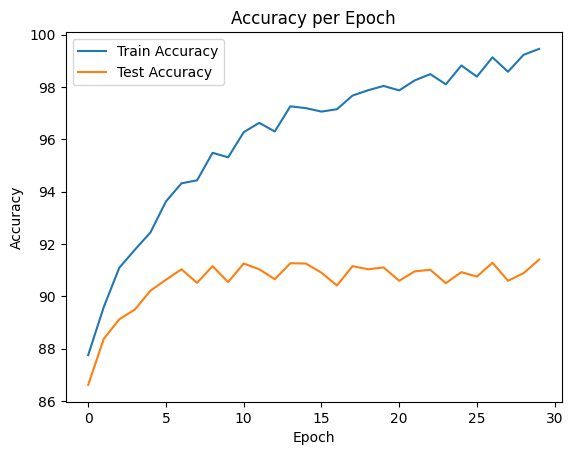

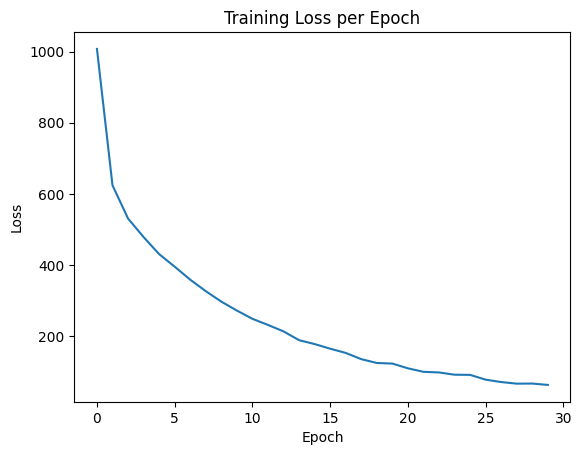

Final Train Accuracy: 99.4517
Final Test Accuracy: 91.4000


In [38]:
#ReLU lr 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

net = MyCNN2(nn.ReLU()).to(device)
net.apply(weights_init)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)